In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '../Libraries_Paper')
import clusterAnalysis as ca

import pandas as pd
import numpy as np

import scipy as sc
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
def getdfprocess(df):
    df_aux = df.drop_duplicates(['Admissiondboid'], keep='first').reset_index(drop=True)
    
    df_aux = df_aux.drop(np.where(df_aux['Origin'].isna())[0], axis=0)
    df_aux['SAPSIIIScore'].fillna((df_aux['SAPSIIIScore'].median()), inplace=True)

    print("NaNs df: ", df_aux.isnull().any().any())
    Origin = pd.get_dummies(df_aux.Origin, prefix='Origin')
    df_aux = df_aux.drop(["Origin"], axis=1)
    df_aux = pd.concat([df_aux, Origin],axis=1).reset_index(drop=True)
    
    return df_aux


def getData(data, typeData, name_cluster):

    df1 = pd.read_csv("./clusters/"+typeData+"/df_cluster"+name_cluster+".csv")

    df1 = df1[['Admissiondboid']].merge(data, how='left')
    df1 = df1.drop(np.where(df1.isna())[0], axis=0)
    df1 = df1.drop_duplicates()

    values = df1[['Origin']].value_counts().values
    keys = df1.Origin.value_counts().keys()

    keys_orig = data.Origin.value_counts().keys()
    arr = np.zeros((len(keys_orig), 1))
    for i in range(len(keys_orig)):
        for j in range(len(keys)):
            if keys_orig[i] == keys[j]:
                arr[i] = values[j]


    return arr


def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
def getData_continuas(data, name_cluster, variable):

    df1 = pd.read_csv("./clusters/df_cluster"+name_cluster+".csv")

    df1 = df1[['Admissiondboid']].merge(data, how='left')
    df1 = df1.drop(np.where(df1.isna())[0], axis=0)
    df1 = df1.drop_duplicates()

    return df1[variable]

In [3]:
df_MR = pd.read_csv("./dfTFMFinalv6.csv", low_memory=False)
df_MR = ca.buildSampledDataframes(df_MR, False)
group = df_MR[["Admissiondboid",
                 "Origin", "Destination",
                 'SAPSIIIScore',
                 'Age', 'Gender',
                 "MR"]]

data = group.drop(np.where(group['Origin'].isna())[0], axis=0)
data['SAPSIIIScore'].fillna((data['SAPSIIIScore'].median()), inplace=True)

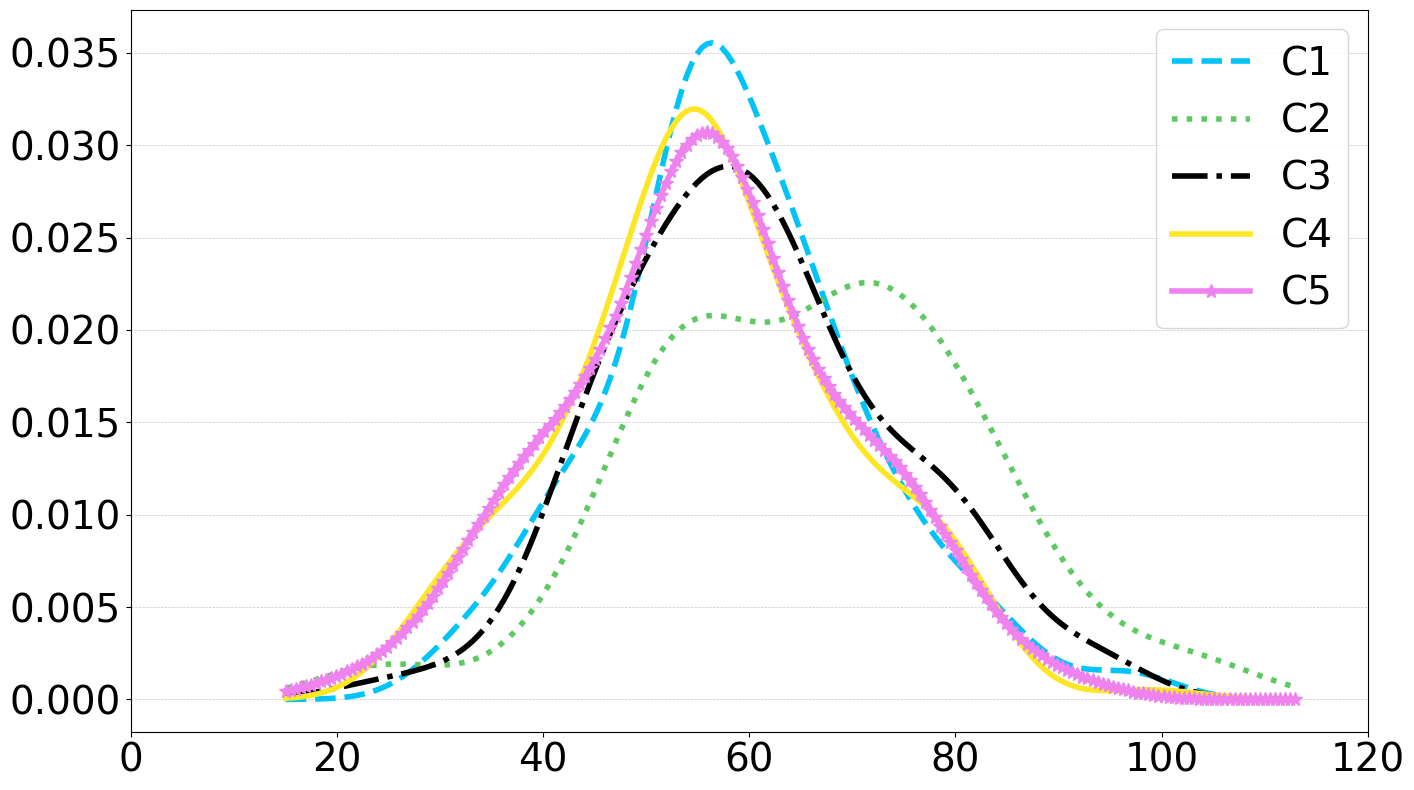

In [11]:
import seaborn as sns
import scipy.stats

name_cluster = ["C1", "C2", "C3", "C4", "C5"]

plt.figure(figsize=(14,8))
cluster_c1 = getData_continuas(data, name_cluster[0], 'SAPSIIIScore').values
cluster_c2 = getData_continuas(data, name_cluster[1], 'SAPSIIIScore').values
cluster_c3 = getData_continuas(data, name_cluster[2], 'SAPSIIIScore').values
cluster_c4 = getData_continuas(data, name_cluster[3], 'SAPSIIIScore').values
cluster_c5 = getData_continuas(data, name_cluster[4], 'SAPSIIIScore').values

# test values for the bw_method option ('None' is the default value)
bw_values =  [None]

# generate a list of kde estimators for each bw
kde_cluster_c1 = [scipy.stats.gaussian_kde(cluster_c1,bw_method=bw) for bw in bw_values]
kde_cluster_c2 = [scipy.stats.gaussian_kde(cluster_c2,bw_method=bw) for bw in bw_values]
kde_cluster_c3 = [scipy.stats.gaussian_kde(cluster_c3,bw_method=bw) for bw in bw_values]
kde_cluster_c4 = [scipy.stats.gaussian_kde(cluster_c4,bw_method=bw) for bw in bw_values]
kde_cluster_c5 = [scipy.stats.gaussian_kde(cluster_c5,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
import matplotlib.pyplot as plt 
#plt.hist(derecho, 20, density=True,stacked=False, facecolor='green', alpha=0);
plt.xlim(0,120)

# plot density estimates
t_range = np.linspace(min(cluster_c1)-15,max(cluster_c1)+15,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde_cluster_c1[i](t_range), color = '#00c3f8',linewidth= 4, linestyle="--", label='C1')
    plt.plot(t_range,kde_cluster_c2[i](t_range), color = '#5ec962',linewidth= 4,linestyle=":", label='C2')
    plt.plot(t_range,kde_cluster_c3[i](t_range),color = 'black',linewidth= 4,  linestyle="-.", label='C3')
    plt.plot(t_range,kde_cluster_c4[i](t_range),color = '#fde725',linewidth=4, label='C4')
    plt.plot(t_range,kde_cluster_c5[i](t_range),color = 'violet',linewidth= 4,marker="*", markersize=10, label='C5')
    
plt.legend(prop={'size': 28})
matplotlib.rc('xtick', labelsize=28) 
matplotlib.rc('ytick', labelsize=28)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("./1_DTW_kernel/SAPSIIIScore.pdf")

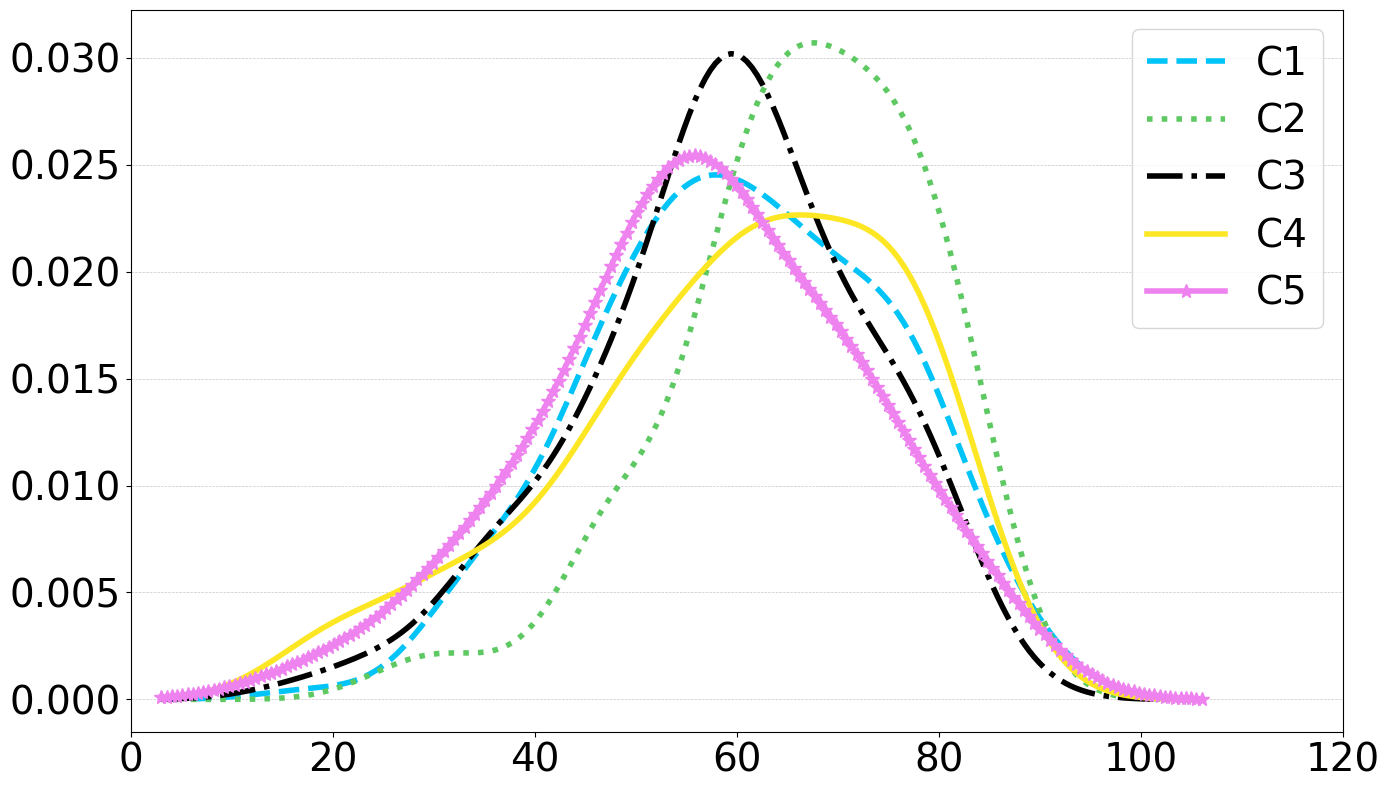

In [5]:
import seaborn as sns
import scipy.stats

name_cluster = ["C1", "C2", "C3", "C4", "C5"]

plt.figure(figsize=(14,8))
cluster_c1 = getData_continuas(data, name_cluster[0], 'Age').values
cluster_c2 = getData_continuas(data, name_cluster[1], 'Age').values
cluster_c3 = getData_continuas(data, name_cluster[2], 'Age').values
cluster_c4 = getData_continuas(data, name_cluster[3], 'Age').values
cluster_c5 = getData_continuas(data, name_cluster[4], 'Age').values

# test values for the bw_method option ('None' is the default value)
bw_values =  [None]

# generate a list of kde estimators for each bw
kde_cluster_c1 = [scipy.stats.gaussian_kde(cluster_c1,bw_method=bw) for bw in bw_values]
kde_cluster_c2 = [scipy.stats.gaussian_kde(cluster_c2,bw_method=bw) for bw in bw_values]
kde_cluster_c3 = [scipy.stats.gaussian_kde(cluster_c3,bw_method=bw) for bw in bw_values]
kde_cluster_c4 = [scipy.stats.gaussian_kde(cluster_c4,bw_method=bw) for bw in bw_values]
kde_cluster_c5 = [scipy.stats.gaussian_kde(cluster_c5,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
import matplotlib.pyplot as plt 
#plt.hist(derecho, 20, density=True,stacked=False, facecolor='green', alpha=0);
plt.xlim(0,120)

# plot density estimates
t_range = np.linspace(min(cluster_c1)-15,max(cluster_c1)+15,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde_cluster_c1[i](t_range), color = '#00c3f8',linewidth= 4, linestyle="--", label='C1')
    plt.plot(t_range,kde_cluster_c2[i](t_range), color = '#5ec962',linewidth= 4,linestyle=":", label='C2')
    plt.plot(t_range,kde_cluster_c3[i](t_range),color = 'black',linewidth= 4,  linestyle="-.", label='C3')
    plt.plot(t_range,kde_cluster_c4[i](t_range),color = '#fde725',linewidth=4, label='C4')
    plt.plot(t_range,kde_cluster_c5[i](t_range),color = 'violet',linewidth= 4,marker="*", markersize=10, label='C5')
    
plt.legend(prop={'size': 28})
matplotlib.rc('xtick', labelsize=28) 
matplotlib.rc('ytick', labelsize=28)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("./1_DTW_kernel/Age.pdf")

## Bar diagram for Origin and Destination

In [6]:
def getData2(data, name_cluster):

    df1 = pd.read_csv("./clusters/df_cluster"+name_cluster+".csv")

    df1 = df1[['Admissiondboid']].merge(data, how='left')
    df1 = df1.drop(np.where(df1.isna())[0], axis=0)
    df1 = df1.drop_duplicates()

    values = df1[['Origin']].value_counts().values
    keys = df1.Origin.value_counts().keys()

    keys_orig = data.Origin.value_counts().keys()
    arr = np.zeros((len(keys_orig), 1))
    for i in range(len(keys_orig)):
        for j in range(len(keys)):
            if keys_orig[i] == keys[j]:
                arr[i] = np.round((values[j]/df1.shape[0])*100,4)


    return arr


def getPercentagesByVar(name_cluster, data, var):
    df1 = pd.read_csv("./clusters/df_cluster"+name_cluster+".csv")

    df1 = pd.merge(df1[['Admissiondboid']], data, on="Admissiondboid", how='left').drop_duplicates().reset_index(drop=True)
    df1 = df1.drop(np.where(df1[var].isna())[0], axis=0)

    values = df1[[var]].value_counts().values
    keys = df1[var].value_counts().keys()

    keys_orig = data[var].value_counts().keys()
    arr = np.zeros((len(keys_orig), 1))
    for i in range(len(keys_orig)):
        for j in range(len(keys)):
            if keys_orig[i] == keys[j]:
                arr[i] = np.round((values[j]/df1.shape[0])*100,4)

    return arr

In [7]:
df_MR = pd.read_csv("./dfTFMFinalv6.csv", low_memory=False)
df_MR = ca.buildSampledDataframes(df_MR, False)
group = df_MR[["Admissiondboid",
                 "Origin", "Destination",
                 'SAPSIIIScore',
                 'Age', 'Gender',
                 "MR"]]

data = group.drop(np.where(group['Destination'].isna())[0], axis=0)
data['SAPSIIIScore'].fillna((data['SAPSIIIScore'].median()), inplace=True)

var="Origin"
# var="Destination"
if var == "Origin":
    if not data[data[var] == "surgery room"].empty:
        data[var].loc[data.Origin == "surgery room"] = "general surgery"
        print("Changed surgery room to general surgery")

    if not data[data[var] == "other floor"].empty:
        data[var].loc[data.Origin == "other floor"] = "others"
        print("Changed other floor to others")

    if not data[data[var] == "anaesthesia"].empty:
        data[var].loc[data.Origin == "anaesthesia"] = "pacu"
        print("Changed anaesthesia floor to pacu")

    if not data[data[var] == "resucitation unit"].empty:
        data[var].loc[data.Origin == "resucitation unit"] = "pacu"
        print("Changed resuscitation unit floor to pacu")
else:
    if not data[data[var] == "floor"].empty:
        data[var].loc[data.Destination == "floor"] = "internal medicine"
        print("Changed floor to internal medicine")
    
    if not data[data[var] == "resuscitation unit"].empty:
        data[var].loc[data.Destination == "resuscitation unit"] = "pacu"
        print("Changed resuscitation unit floor to pacu")

data[var].loc[data.Origin == "urgencies"] = "emergency room"
print("Changed urgencies floor to emergency room")


Changed surgery room to general surgery
Changed other floor to others
Changed anaesthesia floor to pacu
Changed urgencies floor to emergency room


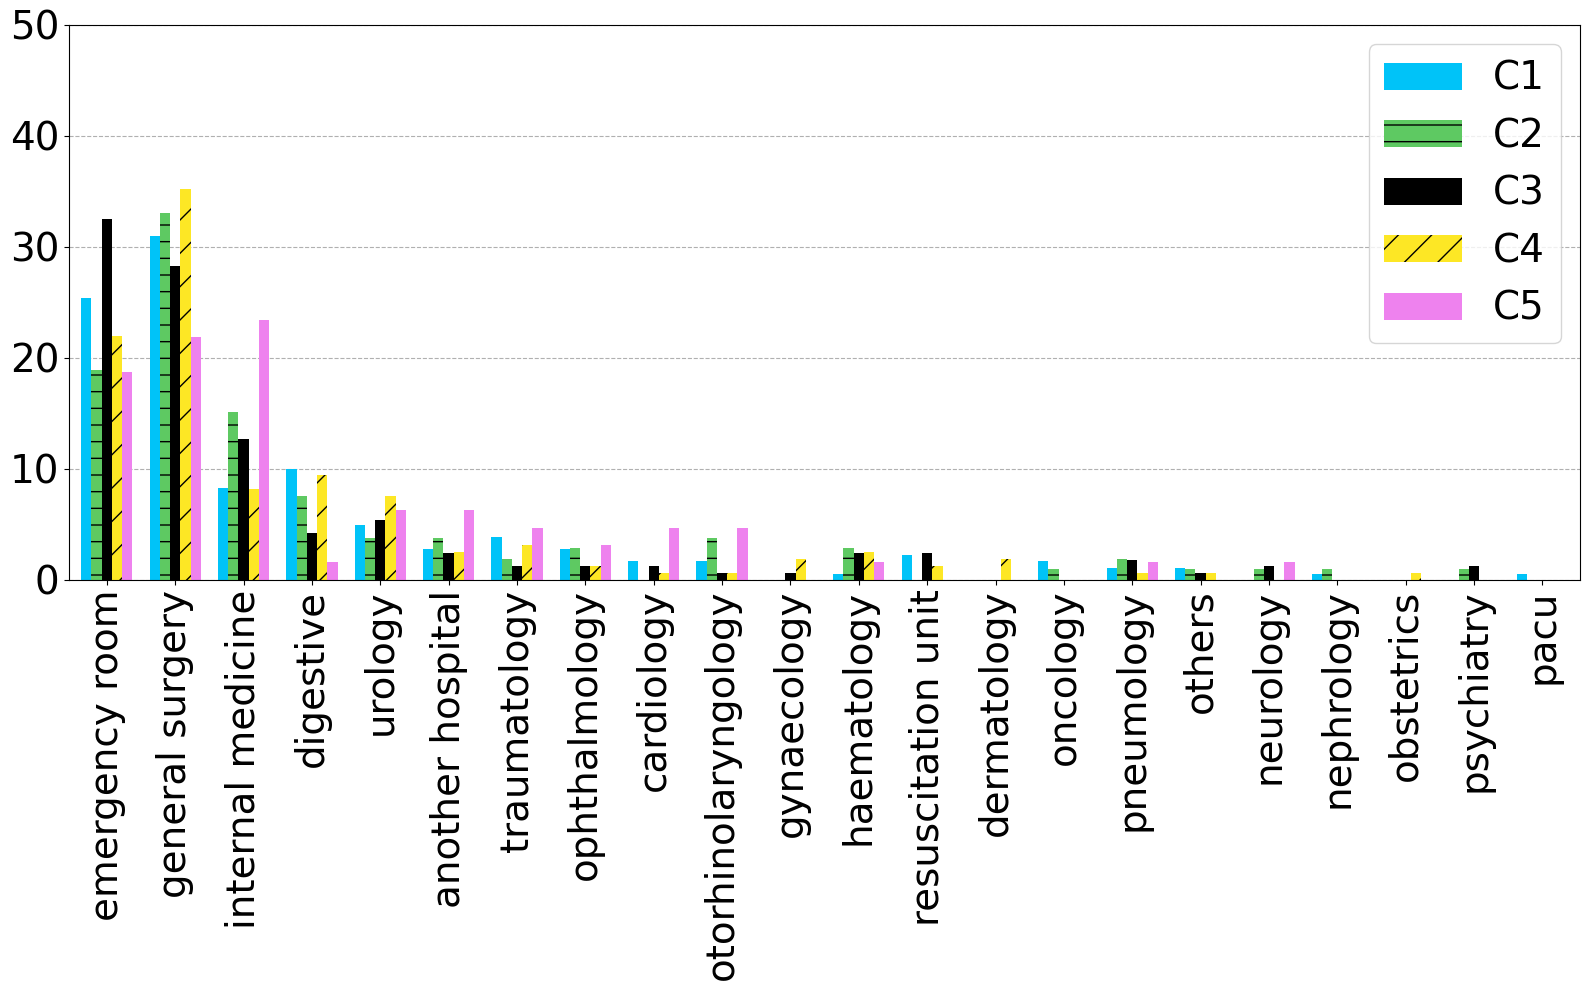

In [8]:
name_cluster = ["C1", "C2", "C3", "C4", "C5"]

cluster_c1 = getPercentagesByVar(name_cluster[0], data, "Origin")
cluster_c2 = getPercentagesByVar(name_cluster[1], data, "Origin")
cluster_c3 = getPercentagesByVar(name_cluster[2], data, "Origin")
cluster_c4 = getPercentagesByVar(name_cluster[3], data, "Origin")
cluster_c5 = getPercentagesByVar(name_cluster[4], data, "Origin")


indices_c1 = np.where(np.isin(cluster_c1, 0, assume_unique=True))[0]
indices_c2 = np.where(np.isin(cluster_c2, 0, assume_unique=True))[0]
indices_c3 = np.where(np.isin(cluster_c3, 0, assume_unique=True))[0]
indices_c4 = np.where(np.isin(cluster_c4, 0, assume_unique=True))[0]
indices_c5 = np.where(np.isin(cluster_c5, 0, assume_unique=True))[0]


a = np.intersect1d(indices_c1, indices_c2)
a = np.intersect1d(a, indices_c3)
a = np.intersect1d(a, indices_c4)
vars_to_delete = np.intersect1d(a, indices_c5)


cluster_c1 = list(tuple(cluster_c1.reshape(1, -1)[0]))
cluster_c2 = list(tuple(cluster_c2.reshape(1, -1)[0]))
cluster_c3 = list(tuple(cluster_c3.reshape(1, -1)[0]))
cluster_c4 = list(tuple(cluster_c4.reshape(1, -1)[0]))
cluster_c5 = list(tuple(cluster_c5.reshape(1, -1)[0]))


# delete values given variable index
delete_multiple_element(cluster_c1, vars_to_delete)
delete_multiple_element(cluster_c2, vars_to_delete)
delete_multiple_element(cluster_c3, vars_to_delete)
delete_multiple_element(cluster_c4, vars_to_delete)
delete_multiple_element(cluster_c5, vars_to_delete)


keys_finales = list(tuple(data.Origin.value_counts().keys()))
delete_multiple_element(keys_finales, vars_to_delete)
n_groups = len(keys_finales)
# create plot
fig, ax = plt.subplots(figsize=(16, 10))
index = np.arange(len(keys_finales))
bar_width = 0.15
opacity = 1


rects1 = plt.bar(index +  0.75, cluster_c1, bar_width, alpha=opacity, color='#00c3f8', label='C1')
rects2 = plt.bar(index + 0.75 + bar_width, cluster_c2, bar_width, alpha=opacity, color='#5ec962', label='C2', hatch='-')
rects3 = plt.bar(index +  0.90 + bar_width, cluster_c3, bar_width, alpha=opacity, color='black', label='C3')
rects4 = plt.bar(index +  1.05 + bar_width, cluster_c4, bar_width, alpha=opacity, color='#fde725', label='C4', hatch='/')
rects5 = plt.bar(index +  1.20 + bar_width, cluster_c5, bar_width, alpha=opacity, color='violet', label='C5')

plt.xticks(index + 0.9 + bar_width, tuple(keys_finales), rotation=90)
plt.xlim(0.5, 22.6)
plt.legend(prop={'size': 28})
# plt.xticks(rotation=90)

plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=28) 
matplotlib.rc('ytick', labelsize=28)
plt.ylim(0, 50)

ax.yaxis.grid(linestyle = 'dashed')  
ax.set_axisbelow(True)  
plt.tight_layout()
plt.savefig("./1_DTW_kernel/Origin.pdf")

In [9]:
df_MR = pd.read_csv("./dfTFMFinalv6.csv", low_memory=False)
df_MR = ca.buildSampledDataframes(df_MR, False)
group = df_MR[["Admissiondboid",
                 "Origin", "Destination",
                 'SAPSIIIScore',
                 'Age', 'Gender',
                 "MR"]]

data = group.drop(np.where(group['Destination'].isna())[0], axis=0)
data['SAPSIIIScore'].fillna((data['SAPSIIIScore'].median()), inplace=True)

var = "Destination"

if var == "Origin":
    if not data[data[var] == "surgery room"].empty:
        data[var].loc[data.Origin == "surgery room"] = "general surgery"
        print("Changed surgery room to general surgery")

    if not data[data[var] == "other floor"].empty:
        data[var].loc[data.Origin == "other floor"] = "others"
        print("Changed other floor to others")

    if not data[data[var] == "anaesthesia"].empty:
        data[var].loc[data.Origin == "anaesthesia"] = "pacu"
        print("Changed anaesthesia floor to pacu")

    if not data[data[var] == "resucitation unit"].empty:
        data[var].loc[data.Origin == "resucitation unit"] = "pacu"
        print("Changed resuscitation unit floor to pacu")
else:
    if not data[data[var] == "floor"].empty:
        data[var].loc[data.Destination == "floor"] = "internal medicine"
        print("Changed floor to internal medicine")
    
    if not data[data[var] == "resuscitation unit"].empty:
        data[var].loc[data.Destination == "resuscitation unit"] = "pacu"
        print("Changed resuscitation unit floor to pacu")

data[var].loc[data.Destination == "urgencies"] = "emergency room"
print("Changed urgencies floor to emergency room")


Changed floor to internal medicine
Changed resuscitation unit floor to pacu
Changed urgencies floor to emergency room


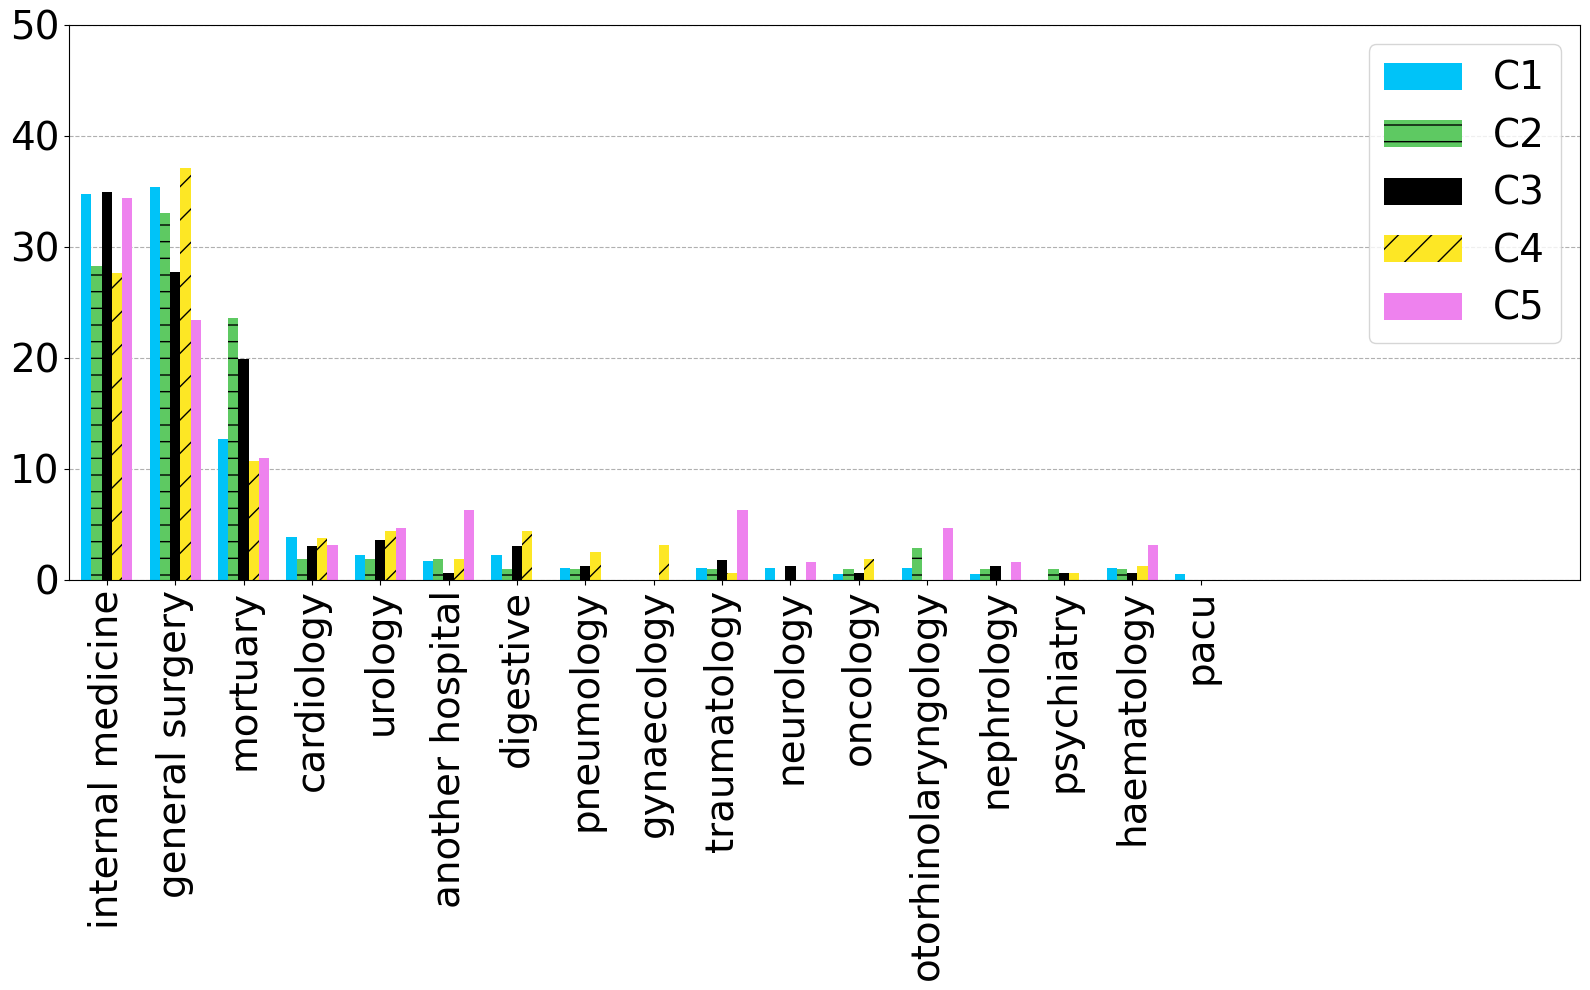

In [10]:
name_cluster = ["C1", "C2", "C3", "C4", "C5"]

cluster_c1 = getPercentagesByVar(name_cluster[0], data, "Destination")
cluster_c2 = getPercentagesByVar(name_cluster[1], data, "Destination")
cluster_c3 = getPercentagesByVar(name_cluster[2], data, "Destination")
cluster_c4 = getPercentagesByVar(name_cluster[3], data, "Destination")
cluster_c5 = getPercentagesByVar(name_cluster[4], data, "Destination")


indices_c1 = np.where(np.isin(cluster_c1, 0, assume_unique=True))[0]
indices_c2 = np.where(np.isin(cluster_c2, 0, assume_unique=True))[0]
indices_c3 = np.where(np.isin(cluster_c3, 0, assume_unique=True))[0]
indices_c4 = np.where(np.isin(cluster_c4, 0, assume_unique=True))[0]
indices_c5 = np.where(np.isin(cluster_c5, 0, assume_unique=True))[0]


a = np.intersect1d(indices_c1, indices_c2)
a = np.intersect1d(a, indices_c3)
a = np.intersect1d(a, indices_c4)
vars_to_delete = np.intersect1d(a, indices_c5)


cluster_c1 = list(tuple(cluster_c1.reshape(1, -1)[0]))
cluster_c2 = list(tuple(cluster_c2.reshape(1, -1)[0]))
cluster_c3 = list(tuple(cluster_c3.reshape(1, -1)[0]))
cluster_c4 = list(tuple(cluster_c4.reshape(1, -1)[0]))
cluster_c5 = list(tuple(cluster_c5.reshape(1, -1)[0]))


# delete values given variable index
delete_multiple_element(cluster_c1, vars_to_delete)
delete_multiple_element(cluster_c2, vars_to_delete)
delete_multiple_element(cluster_c3, vars_to_delete)
delete_multiple_element(cluster_c4, vars_to_delete)
delete_multiple_element(cluster_c5, vars_to_delete)


keys_finales = list(tuple(data.Destination.value_counts().keys()))
delete_multiple_element(keys_finales, vars_to_delete)
n_groups = len(keys_finales)
# create plot
fig, ax = plt.subplots(figsize=(16, 10))
index = np.arange(len(keys_finales))
bar_width = 0.15
opacity = 1


rects1 = plt.bar(index +  0.75, cluster_c1, bar_width, alpha=opacity, color='#00c3f8', label='C1')
rects2 = plt.bar(index + 0.75 + bar_width, cluster_c2, bar_width, alpha=opacity, color='#5ec962', label='C2', hatch='-')
rects3 = plt.bar(index +  0.90 + bar_width, cluster_c3, bar_width, alpha=opacity, color='black', label='C3')
rects4 = plt.bar(index +  1.05 + bar_width, cluster_c4, bar_width, alpha=opacity, color='#fde725', label='C4', hatch='/')
rects5 = plt.bar(index +  1.20 + bar_width, cluster_c5, bar_width, alpha=opacity, color='violet', label='C5')

plt.xticks(index + 0.9 + bar_width, tuple(keys_finales), rotation=90)
plt.xlim(0.5, 22.6)
plt.legend(prop={'size': 28})
# plt.xticks(rotation=90)

plt.xticks(rotation=90)
matplotlib.rc('xtick', labelsize=28) 
matplotlib.rc('ytick', labelsize=28)
plt.ylim(0, 50)

ax.yaxis.grid(linestyle = 'dashed')  # grid lines
ax.set_axisbelow(True)  # grid lines are behind the rest
plt.tight_layout()
plt.savefig("./1_DTW_kernel/Destination.pdf")